In [229]:
%matplotlib inline

In [230]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import zscore

In [231]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [232]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import model_selection, preprocessing 

In [233]:
data= pd.read_csv("wine.csv",header=None)

In [234]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [236]:
data.columns=['Class','Alcohol','Malic acid','Ash', 'Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wine','Proline']

In [237]:

data_new=data.iloc[:,1:]
data_y=data.iloc[:,0]
data_new=data_new.apply(zscore)

In [238]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                        178 non-null float64
Malic acid                     178 non-null float64
Ash                            178 non-null float64
Alcalinity of ash              178 non-null float64
Magnesium                      178 non-null float64
Total phenols                  178 non-null float64
Flavanoids                     178 non-null float64
Nonflavanoid phenols           178 non-null float64
Proanthocyanins                178 non-null float64
Color intensity                178 non-null float64
Hue                            178 non-null float64
OD280/OD315 of diluted wine    178 non-null float64
Proline                        178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [239]:
data_new.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wine,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


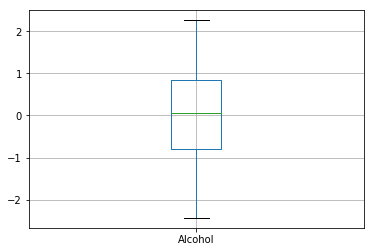

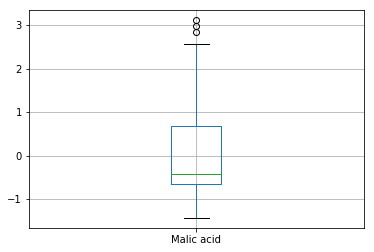

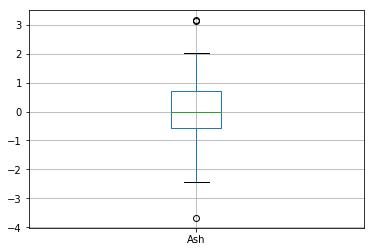

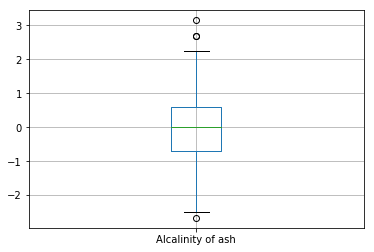

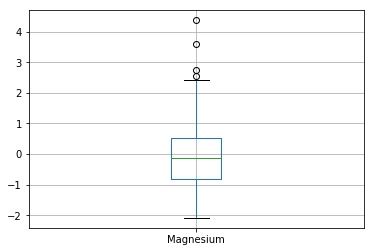

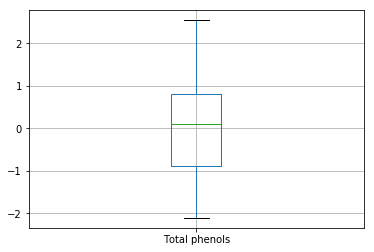

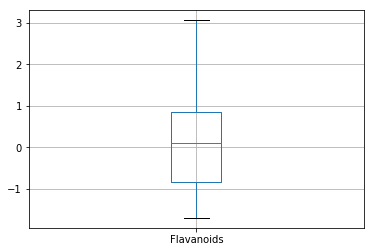

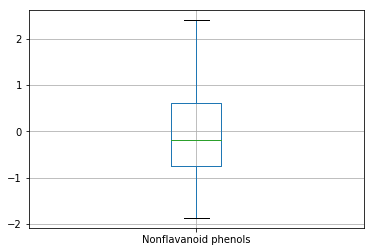

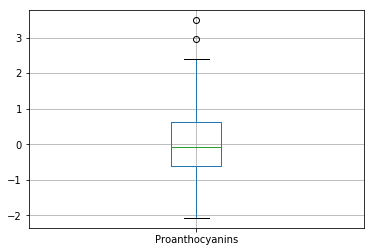

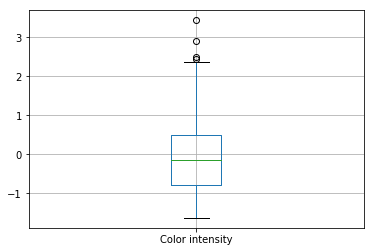

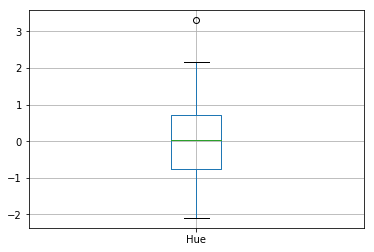

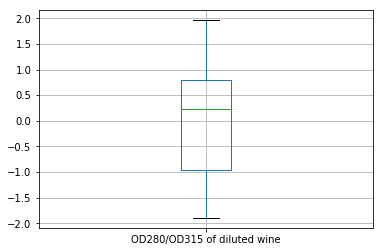

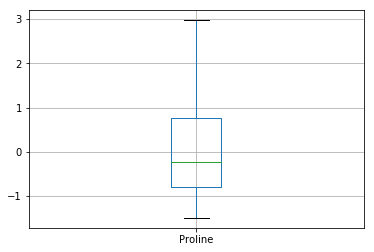

In [240]:
for i in data_new.columns:
    data_new.boxplot(column=i)
    plt.show()

In [241]:
from sklearn.decomposition import PCA


In [255]:
pca = PCA()
wine_pca = pca.fit_transform(data_new)
#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2'])


In [256]:
#principalDf = pd.DataFrame(data = principalComponents ,columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])

In [257]:
#principalDf.head(10)

In [258]:
pca.explained_variance_
#len(pca.explained_variance_)

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [259]:
#Lets investigate proportion of varianve in elbow method
#pca.get_covariance()

In [260]:
pca.explained_variance_ratio_


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [261]:
pca.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

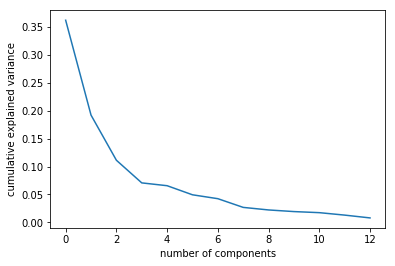

In [262]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [250]:
#lest investigate performance of 3 models with n without pca

In [251]:
DTClassifier = DecisionTreeClassifier (max_depth=3,criterion='gini',min_samples_split=2, random_state = 0)
 
DTClassifier.fit (data_new,data_y)
predicted_labels = DTClassifier.predict(data_new)

In [252]:
score = accuracy_score(data_y,predicted_labels)
print(score)

0.9775280898876404


In [263]:
DTClassifier = DecisionTreeClassifier (max_depth=3,criterion='gini',min_samples_split=2, random_state = 0)
 
DTClassifier.fit(wine_pca,data_y)
predicted_labels = DTClassifier.predict(wine_pca)

In [264]:
score = accuracy_score(data_y,predicted_labels)
print(score)

0.9887640449438202
